<a href="https://colab.research.google.com/github/ReidelVichot/LC_identification/blob/main/predict_emp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. PROBLEM DEFINITION

**Background**

“A logistics cluster (LC) is defined as the geographical concentration of firms providing logistics services, such as transportation carriers, warehousing providers, third-party logistics (3PL-s), and forwarders, as well as some other enterprises that are mainly in the logistics business, including logistics enterprises to provide services to various industries” (Rivera et al., 2014, p. 223).  

Several relevant scholars in the field of logistics claim that clustering logistic activity has a positive impact on the efficiency of the economic activity, reduction of costs, and increase of collaboration among the firms that belong to the cluster (Rivera et al., 2014; Rivera, Gligor, et al., 2016; Rivera, Sheffi, et al., 2016; Sheffi, 2013, 2012). Although some of these authors mention that some of these benefits require some trade-offs (Rivera, Gligor, et al., 2016), these trade-offs are not further explored, resulting in an incomplete understanding of the socio-economic effects of the agglomeration of logistics activity. This becomes more problematic given that governments around the world seem to be embracing the idea of logistics clusters being some sort of panacea for economic development based on supply chain management improvements (Baranowski et al., 2015; Baydar et al., 2019; Chung, 2016), even though empirical studies that assess the role of government spending on the formation of logistics clusters are lacking (Liu et al., 2022). In other words, the field still lacks methodological and theoretical development, resulting in an incomplete understanding of the mechanisms of logistical clustering and their socio-economic effects.

**Problem**

There is not a current database of logistics clusters in the US. However, Rivera et al (2014) designed a method to test logistical agglomeration in US counties using NAICS codes and [CBP](https://www.census.gov/programs-surveys/cbp.html) information. Before conducting analyis on the effects of Logistics Clusters on society and the role of governments in their formation it is necessary to have an accurate picture of all logistics clusters in the US. For this purpose, I will extend Reviera's et al (2014) methodology to all the CBP years in which NAICS codes are used and use this database for future analyses.

#2. DATA COLLECTION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# -- import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# -- this line is to make pandas future-proof, Copy-on-Write will become the default in pandas 3.0.
pd.options.mode.copy_on_write = True

In [20]:
# -- set working directory
dpath = "/content/drive/MyDrive/Disertation/"
# -- create dataframe
fname00 = dpath + "CBP_data/cbp00co/cbp00co.txt"
cbp00 = pd.read_csv(fname00)

In [9]:
cbp00.columns

Index(['fipstate', 'fipscty', 'naics', 'empflag', 'emp', 'qp1', 'ap', 'est',
       'n1_4', 'n5_9', 'n10_19', 'n20_49', 'n50_99', 'n100_249', 'n250_499',
       'n500_999', 'n1000', 'n1000_1', 'n1000_2', 'n1000_3', 'n1000_4',
       'censtate', 'cencty'],
      dtype='object')

In [30]:
cbp00[cbp00["naics"].str.contains("------")].groupby("empflag").count()

,fipstate,fipscty,naics,emp,qp1,ap,est,n1_4,n5_9,n10_19,...,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4,censtate,cencty
empflag,,,,,,,,,,,,,,,,,,,,,
A,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
B,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
E,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
F,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
G,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
H,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
I,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
J,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
K,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
cbp00[cbp00["empflag"].isna()]

In [33]:
# -- import statmodels using the formula api
import statsmodels.formula.api as sm

# -- first build the model
model = sm.ols("emp ~ n1_4 + n5_9 + n10_19 + n20_49 + n50_99 + n100_249 + n250_499 + n500_999 + n1000_1 + n1000_2 + n1000_3 + n1000_4", data=cbp00[cbp00["empflag"].isna()])

# -- now fit the model to the data
result = model.fit()

# -- summarize the model fit
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.264e+07
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:59:15   Log-Likelihood:            -5.0978e+06
No. Observations:              726913   AIC:                         1.020e+07
Df Residuals:                  726900   BIC:                         1.020e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1013      0.318     -3.468      0.0

In [34]:
result

In [ ]:
cbp08[['emp','empflag', 'est', 'n1_4', 'n5_9', 'n10_19', 'n20_49',
       'n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000', 'n1000_1',
       'n1000_2', 'n1000_3', 'n1000_4']][cbp08["est"]==1].groupby("empflag").count()

,emp,est,n1_4,n5_9,n10_19,n20_49,n50_99,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4
empflag,,,,,,,,,,,,,,,
A,602029,602029,602029,602029,602029,602029,602029,602029,602029,602029,602029,602029,602029,602029,602029
B,90320,90320,90320,90320,90320,90320,90320,90320,90320,90320,90320,90320,90320,90320,90320
C,23526,23526,23526,23526,23526,23526,23526,23526,23526,23526,23526,23526,23526,23526,23526
E,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405
F,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203
G,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505,1505
H,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
I,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
J,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [ ]:
cols = ['fipstate', 'fipscty', 'naics', 'emp', 'est', 'n1_4', 'n5_9', 'n10_19', 'n20_49',
       'n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000', 'n1000_1',
       'n1000_2', 'n1000_3', 'n1000_4']
cbp98 = cbp98[cols]
cbp08 = cbp08[cols]

In [ ]:
cbp08[cbp08["est"]==0]

,fipstate,fipscty,naics,emp,est,n1_4,n5_9,n10_19,n20_49,n50_99,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4


In [ ]:
cbp08['emp'] = cbp08.apply(lambda row: row['n1_4']*2.5 + row['n5_9']*7 +
                           row['n10_19']*14.5	+ row['n20_49']*34.5 +
                           row['n50_99']*74.5 + row['n100_249']*174.5 +
                           row['n250_499']*374.5 + row['n500_999']*749.5 +
                           row['n1000_1']*1249.5 + row['n1000_2']*1999.5 +
                           row['n1000_3']*3759.5 + row['n1000_4']*5000 if row['emp'] == 0 else row['emp'], axis=1)

In [ ]:
cbp08.describe()

,fipstate,fipscty,emp,est,n1_4,n5_9,n10_19,n20_49,n50_99,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4
count,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06,2.185865e+06
mean,3.013964e+01,1.024319e+02,3.351429e+02,2.084087e+01,1.125340e+01,3.973828e+00,2.669106e+00,1.823208e+00,6.192212e-01,3.597560e-01,8.971460e-02,3.313379e-02,1.949709e-02,8.989576e-03,5.937238e-03,3.277421e-03,1.292852e-03
std,1.523826e+01,1.233885e+02,6.046237e+03,3.468426e+02,1.962219e+02,6.130816e+01,4.250718e+01,3.126214e+01,1.120989e+01,6.715655e+00,1.723932e+00,6.716721e-01,5.103443e-01,2.148636e-01,1.646625e-01,1.168244e-01,8.687250e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e+01,3.100000e+01,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.900000e+01,7.300000e+01,2.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.200000e+01,1.270000e+02,1.020000e+02,8.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.600000e+01,9.990000e+02,3.910429e+06,2.502550e+05,1.448240e+05,4.224300e+04,2.877300e+04,2.098500e+04,7.469000e+03,4.306000e+03,1.055000e+03,3.570000e+02,2.430000e+02,9.800000e+01,8.200000e+01,4.400000e+01,4.300000e+01


In [ ]:
# Eliminatin fipscty code 999, this code refers to statewide employment and
# establishments
cbp98_total = cbp98[cbp98.naics.str.startswith("-----")]
cbp98_total = cbp98_total[cbp98_total.fipscty != 999]

cbp08_total = cbp08[cbp08.naics.str.startswith("-----")]
cbp08_total = cbp08_total[cbp08_total.fipscty != 999]

In [ ]:
cbp98_total = cbp98_total.rename(columns={"emp": "emp_tot", "est": "est_tot"}).drop(columns="naics")
cbp08_total = cbp08_total.rename(columns={"emp": "emp_tot", "est": "est_tot"}).drop(columns="naics")

In [ ]:
cbp98_total["GEOID"] = cbp98_total.fipstate.astype(str).str.zfill(2) + cbp98_total.fipscty.astype(str).str.zfill(3)
cbp98_total.drop(columns=["fipscty"], inplace=True)

cbp08_total["GEOID"] = cbp08_total.fipstate.astype(str).str.zfill(2) + cbp08_total.fipscty.astype(str).str.zfill(3)
cbp08_total.drop(columns=["fipscty"], inplace=True)

In [ ]:
# List of logistics sector-related NAICS codes
logistics_sectors = [ "481112", "481212", "481219", "483111", "483113",
                      "483211", "484110", "484121", "484122", "484220",
                      "484230", "488119", "488190", "488210", "488310",
                      "488320", "488330", "488390", "488410", "488490",
                      "488510", "488991", "488999", "492110", "492210",
                      "493110", "493190" ]

In [ ]:
cbp98_logistics = cbp98[cbp98["naics"].isin(logistics_sectors)]
cbp08_logistics = cbp08[cbp08["naics"].isin(logistics_sectors)]


In [ ]:
cbp98_logistics["GEOID"] = cbp98_logistics.fipstate.astype(str).str.zfill(2) + cbp98_logistics.fipscty.astype(str).str.zfill(3)
cbp98_logistics = cbp98_logistics.drop(columns=["fipscty", "fipstate"])

cbp08_logistics["GEOID"] = cbp08_logistics.fipstate.astype(str).str.zfill(2) + cbp08_logistics.fipscty.astype(str).str.zfill(3)
cbp08_logistics = cbp08_logistics.drop(columns=["fipscty", "fipstate"])

In [ ]:
cbp98 = pd.merge(cbp98_logistics.groupby("GEOID").sum(numeric_only=True).reset_index(), cbp98_total, on = ['GEOID'], how = 'outer').fillna(0)
cbp98[["fipstate", "emp", "est", "emp_tot", "est_tot"]] = cbp98[["fipstate", "emp", "est", "emp_tot", "est_tot"]].astype(int)

cbp08 = pd.merge(cbp08_logistics.groupby("GEOID").sum(numeric_only=True).reset_index(), cbp08_total, on = ['GEOID'], how = 'outer').fillna(0)
cbp08[["fipstate", "emp", "est", "emp_tot", "est_tot"]] = cbp08[["fipstate", "emp", "est", "emp_tot", "est_tot"]].astype(int)

#3. DATA PREPARATION

In [ ]:
cbp98["year"] = 1998
cbp08["year"] = 2008

In [ ]:
frames = [cbp98, cbp08]

In [ ]:
cbp = pd.concat(frames)
cbp.reset_index().drop(columns="index")

,GEOID,emp,est,n1_4_x,n5_9_x,n10_19_x,n20_49_x,n50_99_x,n100_249_x,n250_499_x,...,n50_99_y,n100_249_y,n250_499_y,n500_999_y,n1000_y,n1000_1_y,n1000_2_y,n1000_3_y,n1000_4_y,year
0,01001,0,16,8.0,4.0,3.0,1.0,0.0,0.0,0.0,...,16.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1998
1,01003,229,103,65.0,17.0,14.0,5.0,2.0,0.0,0.0,...,70.0,33.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,1998
2,01005,80,47,36.0,4.0,2.0,1.0,2.0,1.0,0.0,...,11.0,14.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1998
3,01007,62,22,15.0,2.0,3.0,2.0,0.0,0.0,0.0,...,9.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1998
4,01009,129,35,25.0,4.0,4.0,2.0,0.0,0.0,0.0,...,5.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,48263,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
6287,48271,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
6288,48301,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
6289,48327,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008


In [ ]:
print(len(cbp))
cbp = cbp[cbp["fipstate"] != 0]
print(len(cbp))
# -- remove Alaska
cbp = cbp[cbp["fipstate"] != 2]
print(len(cbp))
# -- remove Hawaii
cbp = cbp[cbp["fipstate"] != 15]
print(len(cbp))
# -- remove American Samoa
cbp = cbp[cbp["fipstate"] != 60]
print(len(cbp))
# -- remove Guam
cbp = cbp[cbp["fipstate"] != 66]
print(len(cbp))
# -- remove Northern Marianas
cbp = cbp[cbp["fipstate"] != 69]
print(len(cbp))
# -- remove Puerto Rico
cbp = cbp[cbp["fipstate"] != 72]
print(len(cbp))
# -- remove Virgin Islands
cbp = cbp[cbp["fipstate"] != 78]
print(len(cbp))
# -- remove DC
cbp = cbp[cbp["fipstate"] != 11]
print(len(cbp))

6291
6278
6224
6216
6216
6216
6216
6216
6216
6215


In [ ]:
cbp[cbp["year"]== 1998]["est"].sum()

148555

In [ ]:
for i in cbp.year.unique():
  cbp["LEP"] = cbp["est"]/cbp[cbp["year"]== i]["est"].sum()
  print(cbp[cbp["year"]== i]["est"].sum())

148555
177623


In [ ]:
for i in cbp.year.unique():
  cbp["LQ"] = (cbp["emp"]/cbp[cbp["year"]== i]["emp"].sum())/(cbp["emp_tot"]/cbp[cbp["year"]== i]["emp_tot"].sum())
  print(cbp[cbp["year"]== i]["emp"].sum())
  print(cbp[cbp["year"]== i]["emp_tot"].sum())

1703369
106988864
3365067
117109870


In [ ]:
for i in cbp.year.unique():
  cbp["emp_expd"] = (cbp["emp_tot"] * cbp[cbp["year"]== i]["emp"].sum())/(cbp[cbp["year"]== i]["emp_tot"].sum())



In [ ]:
cbp["HCLQ"] = cbp["emp"] - cbp["emp_expd"]

In [ ]:
cbp[(cbp['year'] == 2008) & (cbp["LEP"] > 0.001) & (cbp["HCLQ"]>=5000)]

,GEOID,emp,est,n1_4_x,n5_9_x,n10_19_x,n20_49_x,n50_99_x,n100_249_x,n250_499_x,...,n1000_y,n1000_1_y,n1000_2_y,n1000_3_y,n1000_4_y,year,LEP,LQ,emp_expd,HCLQ
185,06001,23527,816,352.0,151.0,136.0,94.0,44.0,29.0,5.0,...,35.0,15.0,13.0,5.0,2.0,2008,0.004594,1.276503,18430.823724,5096.176276
203,06037,121349,5529,2866.0,956.0,724.0,570.0,238.0,125.0,25.0,...,243.0,97.0,82.0,44.0,20.0,2008,0.031128,1.079970,112363.335249,8985.664751
220,06071,44953,1344,632.0,211.0,169.0,162.0,84.0,53.0,23.0,...,28.0,11.0,12.0,4.0,1.0,2008,0.007567,2.755016,16316.785776,28636.214224
223,06077,14013,532,239.0,84.0,81.0,68.0,34.0,21.0,2.0,...,7.0,3.0,4.0,0.0,0.0,2008,0.002995,2.772616,5054.071315,8958.928685
244,08001,13453,414,200.0,50.0,54.0,63.0,20.0,22.0,4.0,...,6.0,3.0,0.0,3.0,0.0,2008,0.002331,3.250438,4138.827244,9314.172756
332,12031,23713,813,457.0,103.0,84.0,73.0,44.0,35.0,12.0,...,24.0,13.0,4.0,5.0,2.0,2008,0.004577,1.908303,12426.222652,11286.777348
360,12086,37917,2467,1569.0,408.0,227.0,136.0,63.0,41.0,11.0,...,47.0,23.0,13.0,8.0,3.0,2008,0.013889,1.528642,24804.372865,13112.627135
370,12105,10254,379,236.0,52.0,31.0,25.0,12.0,12.0,8.0,...,6.0,2.0,1.0,3.0,0.0,2008,0.002134,2.048331,5006.027610,5247.972390
416,13063,14931,373,142.0,80.0,46.0,56.0,17.0,15.0,12.0,...,3.0,2.0,1.0,0.0,0.0,2008,0.002100,6.979588,2139.237906,12791.762094
429,13089,14871,332,186.0,42.0,38.0,36.0,11.0,6.0,8.0,...,17.0,5.0,7.0,4.0,1.0,2008,0.001869,1.809001,8220.559488,6650.440512


In [ ]:
cbp[(cbp['year'] == 2008) & (cbp["LEP"] > 0.001) & (cbp["HCLQ"] > 0)]

,GEOID,emp,est,n1_4_x,n5_9_x,n10_19_x,n20_49_x,n50_99_x,n100_249_x,n250_499_x,...,n1000_y,n1000_1_y,n1000_2_y,n1000_3_y,n1000_4_y,year,LEP,LQ,emp_expd,HCLQ
48,01097,5635,304,139.0,50.0,31.0,60.0,14.0,9.0,1.0,...,10.0,7.0,1.0,2.0,0.0,2008,0.001711,1.212372,4647.912363,987.087637
169,05119,9420,253,102.0,41.0,41.0,44.0,10.0,6.0,7.0,...,17.0,6.0,6.0,4.0,1.0,2008,0.001424,1.416835,6648.622338,2771.377662
185,06001,23527,816,352.0,151.0,136.0,94.0,44.0,29.0,5.0,...,35.0,15.0,13.0,5.0,2.0,2008,0.004594,1.276503,18430.823724,5096.176276
199,06029,6703,429,229.0,67.0,56.0,59.0,11.0,3.0,2.0,...,9.0,6.0,3.0,0.0,0.0,2008,0.002415,1.244394,5386.555590,1316.444410
203,06037,121349,5529,2866.0,956.0,724.0,570.0,238.0,125.0,25.0,...,243.0,97.0,82.0,44.0,20.0,2008,0.031128,1.079970,112363.335249,8985.664751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,51550,2691,203,109.0,37.0,26.0,20.0,6.0,5.0,0.0,...,2.0,1.0,1.0,0.0,0.0,2008,0.001143,1.045705,2573.384040,117.615960
2899,51710,4649,179,71.0,42.0,26.0,19.0,11.0,7.0,2.0,...,12.0,6.0,2.0,4.0,0.0,2008,0.001008,1.239004,3752.207598,896.792402
2940,53053,11316,498,274.0,82.0,59.0,50.0,14.0,12.0,3.0,...,14.0,2.0,9.0,3.0,0.0,2008,0.002804,1.592737,7104.750191,4211.249809
2952,53077,2486,183,104.0,35.0,29.0,9.0,2.0,2.0,1.0,...,1.0,0.0,1.0,0.0,0.0,2008,0.001030,1.333121,1864.796863,621.203137


In [ ]:
cbp[(cbp['year'] == 2008) & (cbp["HCLQ"] < 5000)].fipstate.unique()

array([ 1,  4,  5,  6,  8,  9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [ ]:
cbp[(cbp['year'] == 2008) & (cbp["HCLQ"] > 13000)]["GEOID"]

220     06071
360     12086
740     18097
1040    21111
2047    39049
2480    47157
2547    48113
Name: GEOID, dtype: object

In [ ]:
#county = gpd.read_file(dpath + "/countyshp/tl_2023_us_county/tl_2023_us_county.shp")
county = gpd.read_file(dpath + "/countyshp/tl_2010_us_county10/tl_2010_us_county10.shp")

In [ ]:
county.columns

Index(['STATEFP10', 'COUNTYFP10', 'COUNTYNS10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'LSAD10', 'CLASSFP10', 'MTFCC10', 'CSAFP10', 'CBSAFP10',
       'METDIVFP10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'geometry'],
      dtype='object')

In [ ]:
print(len(county))
# -- remove Alaska
county = county[county["STATEFP10"] != "02"]
print(len(county))
# -- remove Hawaii
county = county[county["STATEFP10"] != "15"]
print(len(county))
# -- remove American Samoa
county = county[county["STATEFP10"] != "60"]
print(len(county))
# -- remove Guam
county = county[county["STATEFP10"] != "66"]
print(len(county))
# -- remove Northern Marianas
county = county[county["STATEFP10"] != "69"]
print(len(county))
# -- remove Puerto Rico
county = county[county["STATEFP10"] != "72"]
print(len(county))
# -- remove Virgin Islands
county = county[county["STATEFP10"] != "78"]
print(len(county))
# -- remove DC
county = county[county["STATEFP10"] != "11"]
print(len(county))

3221
3192
3187
3187
3187
3187
3109
3109
3108


<Axes: >

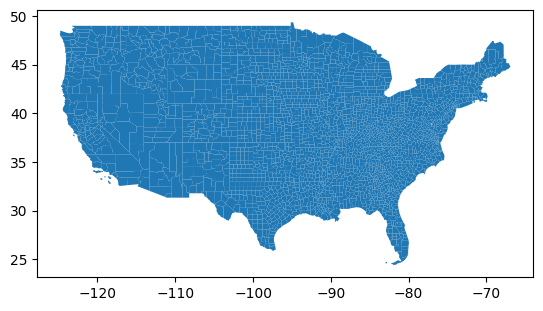

In [ ]:
county.plot()

In [ ]:
np.sort(county.STATEFP10.unique().astype(int))

array([ 1,  4,  5,  6,  8,  9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [ ]:
county.head()

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
2,28,107,00695776,28107,Panola,Panola County,06,H1,G4020,None,None,None,A,1774515519,51767046,+34.3652052,-089.9630654,"POLYGON ((-90.13476 34.22603, -90.13476 34.226..."
3,28,101,00695773,28101,Newton,Newton County,06,H1,G4020,None,None,None,A,1497282694,3879399,+32.4019702,-089.1184115,"POLYGON ((-89.13497 32.57697, -89.13466 32.576..."
4,28,027,00695738,28027,Coahoma,Coahoma County,06,H1,G4020,None,17260,None,A,1430818231,79539470,+34.2286699,-090.6031650,"POLYGON ((-90.59063 33.98690, -90.59473 33.986..."
5,22,065,00558088,22065,Madison,Madison Parish,15,H1,G4020,None,45260,None,A,1617283455,68538668,+32.3658243,-091.2407290,"MULTIPOLYGON (((-91.03511 32.12035, -91.03621 ..."
6,51,540,01789068,51540,Charlottesville,Charlottesville city,25,C7,G4020,None,16820,None,F,26517362,52974,+38.0376579,-078.4853806,"POLYGON ((-78.47071 38.04872, -78.47033 38.048..."


In [ ]:
county = county[['COUNTYFP10', 'NAME10', 'geometry']]

In [ ]:
len(cbp)

6291

In [ ]:
print(len(cbp))
# -- remove Alaska
cbp = cbp[cbp["fipstate"] != 2]
print(len(cbp))
# -- remove Hawaii
cbp = cbp[cbp["fipstate"] != 15]
print(len(cbp))
# -- remove Puerto Rico
cbp = cbp[cbp["fipstate"] != 72]
print(len(cbp))
# -- remove Virgin Islands
cbp = cbp[cbp["fipstate"] != 78]
print(len(cbp))
# -- remove American Samoa
cbp = cbp[cbp["fipstate"] != 60]
# -- remove Guam
cbp = cbp[cbp["fipstate"] != 66]
len(cbp)

6291
6237
6229
6229
6229


6229

In [ ]:
cbp["GEOID"] = cbp.fipstate.astype(str).str.zfill(2) + cbp.fipscty.astype(str).str.zfill(3)

AttributeError: 'DataFrame' object has no attribute 'fipscty'

In [ ]:
cbp.drop(columns=["fipstate", "fipscty"], inplace=True)

In [ ]:
cbp_grouped = cbp.groupby(["year","GEOID"]).sum().reset_index()

In [ ]:
county = county.merge(cbp_grouped, left_on="CNTYIDFP", right_on="GEOID")

In [ ]:
county

In [ ]:
cbp_2008 = county[county["year"]==2008]

In [ ]:
len(cbp_2008)

In [ ]:
cbp_2008["LEP"] = cbp_2008["est"]/cbp_2008["est"].sum()

In [ ]:
cbp_2008[cbp_2008["LEP"] > 0.001717].plot()

In [ ]:
len(cbp_2008[cbp_2008["LEP"] > 0.001717])

In [ ]:
cbp_2008["LQ"] =

In [ ]:
for year in cbp["year"].unique():


#4. MACHINE LEARNING

#5. PROBLEM SOLUTION